**DỰ ĐOÁN GIÁ PHÒNG BOOKING DU LỊCH**

Bài toán dự đoán về giá thuê phòng ở thủ đô Hà Nội dựa vào những dữ liệu được thu thập ở trang booking.com 

# THU THẬP DỮ LIỆU 

**Giải pháp thu thập**

Trang thập dữ liệu: https://www.booking.com/index.vi.html?label=gen173nr-1DCAEoggI46AdIM1gEaPQBiAEBmAEquAEXyAEM2AED6AEBiAIBqAIDuAKYxuKVBsACAdICJDQ4MDBlM2RlLTNiYzUtNGQ2NS1iNzMwLTgxYWUzMWIwZTg2M9gCBOACAQ&sid=72bff0a7eb9e51985d80010fc4502590&keep_landing=1&sb_price_type=total&

Ngôn ngữ thu thập: python

Công cụ thu thập: visual studio, google chorme

Thư viện sử dụng: selenium, requests, BeautifulSou và pandas

**Cách thức thu thập** 

Bước 1. Cài đặt python và thư viện selenium

Bước 2. Cài đặt chorme driver 

Bước 3. Khởi tạo đối tượng driver chỉ định trình duyệt dùng để lấy dữ liệu

Bước 4. Tạo request link đến trang cần lấy dữ liệu 

Bước 5. Dùng thư viện BeautifulSou để convert dữ liệu sang dạng 'html.parse' để đẹp và dễ lấy hơn

Bước 6. Tương tác với dữ liệu trên trang web bằng cách sử dụng đúng các truy cập các phần tử trên trang: 

 - Crawling sử dụng các truy cập:  select, find_elements_by_css_selector

 - Dùng các biến theo tên để gán và thêm vào dữ liệu list cuối cùng


Bước 7. Convert list data cuối cùng sang dạng pandas.Dataframe và lưu nó dưới dạng csv



Input: 

- nPgae: số trang hiện tại đang lấy 
- mPage: số trang tối đa cần lấy 
- lstData: list chứa các giá trị trong một hàng
- filename: tên file csv chứa data sau khi crawl 

Output: 

- Data được crawl: rawdata.csv

**Dữ liệu sau khi thu thập**

- Số lượng: (1079,8)

- Thông tin cột: 

1. type_hotel: Loại phòng được thuê (hotel, local, apartment)

2. location: địa điểm được thuê 

3. distance: vị trí của nơi thuê so với trung tâm thủ đô - Phố Cổ (km)

4. rating: đánh giá của khách sạn (điểm)

5. reviewer: số người đánh giá (người)

6. type_bed: thể loại giường 

7. area: diện tích của phòng (m^2)

8. price: giá thuê phòng (trăm nghìn)  


**Kết quả thu thập**
- file data: rawdata.csv

# Mô tả dữ liệu

In [101]:
import numpy as np
import pandas as pd
from statistics import mean
import re
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold
from math import sqrt
from sklearn.decomposition import PCA
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

In [102]:
df=pd.read_csv('rawdata.csv')
df.head(10)

,type_hotel,location,rating,reviewer,distance,type_bed,area,price
0,hotel,"\n85 Ma May Street, Quận Hoàn Kiếm, Hà Nội, ...","9,0",· 571 đánh giá,"\n4,7 km\n",\n1 giường đôi lớn\n\n,18 m²,\nVND 1.200.000\n
1,hotel,"\n85 Ma May Street, Quận Hoàn Kiếm, Hà Nội, ...","9,0",· 571 đánh giá,"\n4,7 km\n",\n2 giường đơn\n\n,25 m²,\nVND 1.140.000\n
2,hotel,"\n85 Ma May Street, Quận Hoàn Kiếm, Hà Nội, ...","9,0",· 571 đánh giá,"\n4,7 km\n",\n2 giường đơn\n\n,28 m²,\nVND 1.400.000\n
3,hotel,"\n85 Ma May Street, Quận Hoàn Kiếm, Hà Nội, ...","9,0",· 571 đánh giá,"\n4,7 km\n",\n1 giường đôi lớn\n\n,35 m²,\nVND 2.000.000\n
4,hotel,"\n85 Ma May Street, Quận Hoàn Kiếm, Hà Nội, ...","9,0",· 571 đánh giá,"\n4,7 km\n",\n1 giường đơn\n\n,35 m²,\nVND 2.100.000\n
5,hotel,"\n39 Thợ Nhuộm, Quận Hoàn Kiếm, Hà Nội, Việ...","9,4",· 3.039 đánh giá,"\n1,9 km\n",\n1 giường đôi\n\n,22 m²,\nVND 2.683.296\n
6,hotel,"\n39 Thợ Nhuộm, Quận Hoàn Kiếm, Hà Nội, Việ...","9,4",· 3.039 đánh giá,"\n1,9 km\n",\n1 giường đôi cực lớn\n\n,25 m²,\nVND 3.049.200\n
7,hotel,"\n39 Thợ Nhuộm, Quận Hoàn Kiếm, Hà Nội, Việ...","9,4",· 3.039 đánh giá,"\n1,9 km\n",\n1 giường đôi lớn\n\n,25 m²,\nVND 3.005.292\n
8,hotel,"\n39 Thợ Nhuộm, Quận Hoàn Kiếm, Hà Nội, Việ...","9,4",· 3.039 đánh giá,"\n1,9 km\n",\n2 giường đôi lớn\n\n,28 m²,\nVND 3.415.104\n
9,hotel,"\n39 Thợ Nhuộm, Quận Hoàn Kiếm, Hà Nội, Việ...","9,4",· 3.039 đánh giá,"\n1,9 km\n",NaN,28 m²,\nVND 3.327.287\n


In [103]:
df=pd.read_csv('rawdata.csv')
df.loc[df['type_bed'].isnull(), 'type_bed'] = "" 
def standardize_data(df):
    for i in df.index:
        df.at[i,'distance'] = df.at[i,'distance'].replace("\n","")
        df.at[i,'location'] = df.at[i,'location'].split(",")[-3].replace("\n","")
        df.at[i,'price'] = df.at[i,'price'].replace("\n","")
        df.at[i,'rating'] = float(df.at[i,'rating'].replace(",","."))
        df.at[i,'type_bed'] = df.at[i,'type_bed'].replace("\n"," ")
        df.at[i,'type_bed'] = df.at[i,'type_bed'].replace("giường"," ")
        df.at[i,'type_bed'] = df.at[i,'type_bed'].replace("  ","")
        df.at[i,'reviewer'] = df.at[i,'reviewer'].replace("·","")
        df.at[i,'reviewer'] = df.at[i,'reviewer'].replace(" đánh giá","")
        df.at[i,'reviewer'] = round(float(df.at[i,'reviewer'].strip()))
        df.at[i,'distance'] = df.at[i,'distance'].replace(" km","")
        df.at[i,'distance'] = df.at[i,'distance'].replace(",",".")
        df.at[i,'distance'] = float(df.at[i,'distance'])
        df.at[i,'price'] = df.at[i,'price'].replace(" km","")
        df.at[i,'price'] = df.at[i,'price'].replace(".","")
        df.at[i,'price'] = df.at[i,'price'].replace("VND","")
        df.at[i,'price'] = df.at[i,'price'].replace(" ","")
        df.at[i,'price'] = df.at[i,'price'].replace("\t","")
        df.at[i,'price'] = df.at[i,'price'][:-3]
        df.at[i,'area'] = df.at[i,'area'].replace(" m²","")
        
standardize_data(df)
df.head(10)

,type_hotel,location,rating,reviewer,distance,type_bed,area,price
0,hotel,Quận Hoàn Kiếm,9.0,571,4.7,1 đôi lớn,18,1200
1,hotel,Quận Hoàn Kiếm,9.0,571,4.7,2 đơn,25,1140
2,hotel,Quận Hoàn Kiếm,9.0,571,4.7,2 đơn,28,1400
3,hotel,Quận Hoàn Kiếm,9.0,571,4.7,1 đôi lớn,35,2000
4,hotel,Quận Hoàn Kiếm,9.0,571,4.7,1 đơn,35,2100
5,hotel,Quận Hoàn Kiếm,9.4,3,1.9,1 đôi,22,2683
6,hotel,Quận Hoàn Kiếm,9.4,3,1.9,1 đôi cực lớn,25,3049
7,hotel,Quận Hoàn Kiếm,9.4,3,1.9,1 đôi lớn,25,3005
8,hotel,Quận Hoàn Kiếm,9.4,3,1.9,2 đôi lớn,28,3415
9,hotel,Quận Hoàn Kiếm,9.4,3,1.9,,28,3327


In [104]:
### a 
lstTypeC = []
for column in df.columns: 
    lstTypeC.append([column, type(df.at[0,column])])
print(pd.DataFrame(lstTypeC, columns=['Column', 'Type']))

       Column             Type
0  type_hotel    <class 'str'>
1    location    <class 'str'>
2      rating  <class 'float'>
3    reviewer    <class 'int'>
4    distance  <class 'float'>
5    type_bed    <class 'str'>
6        area    <class 'str'>
7       price    <class 'str'>


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 0 to 1123
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type_hotel  1079 non-null   object
 1   location    1079 non-null   object
 2   rating      1079 non-null   object
 3   reviewer    1079 non-null   object
 4   distance    1079 non-null   object
 5   type_bed    1079 non-null   object
 6   area        1079 non-null   object
 7   price       1079 non-null   object
dtypes: object(8)
memory usage: 108.2+ KB


In [106]:
df.describe()

,type_hotel,location,rating,reviewer,distance,type_bed,area,price
count,1079,1079,1079.0,1079,1079.0,1079,1079,1079
unique,3,28,36.0,146,58.0,14,68,609
top,hotel,Quận Hoàn Kiếm,9.1,43,0.0,,Căn hộ nguyên căn,1100
freq,556,388,89.0,40,251.0,276,197,22


In [107]:
# check null value 
print('-----------------------------------------------')
print('------------------------area-------------------')
print(df.area.value_counts().head(5))
print('----------------------type_bed------------------')
print('Value counts : type_bed')
print((df.type_bed.value_counts()).head(5))
print('----------------------distance-----------------')
print('Value counts : distance')
print((df.distance.value_counts()).head(5))

-----------------------------------------------
------------------------area-------------------
Căn hộ nguyên căn    197
25                   130
30                    83
Studio nguyên căn     79
35                    52
Name: area, dtype: int64
----------------------type_bed------------------
Value counts : type_bed
                  276
 1 đôi lớn        248
 1 đôi cực lớn    212
 2 đơn            188
 1 đôi             54
Name: type_bed, dtype: int64
----------------------distance-----------------
Value counts : distance
0.0    251
3.9     74
2.4     62
4.7     48
2.5     46
Name: distance, dtype: int64


**Mô tả dữ liệu**


**Nhận xét dữ liệu**

- Có nhiều trường bị khuyết dữ liệu 

- Nhiều trường dữ liệu cào không đúng theo mong muốn

- Cần xử lý định dạng lại dữ liệu trước khi đi thực hiện các mô hình tính toán

# Tiền xử lý

**1. Xử lý dữ liệu trống**

*1.1. Xử lý dữ liệu trống của area*

a. Area: ['Can ho nguyen can']
type_hotel = 'apartment'

In [108]:
# check kieu dữ liệu area 
(df.area.value_counts()).head(5)

Căn hộ nguyên căn    197
25                   130
30                    83
Studio nguyên căn     79
35                    52
Name: area, dtype: int64

In [109]:
### type_bed = apartment => area = mean(df[df['type_bed']=='apartment'].area)
def checkInt(str):
    try:
        int(str)
        return True
    except ValueError:
        return False

In [110]:
# fix null for area ['Can ho nguyen can']
def computed_area(data_apartment):
      data_apartment_area = []
      for i in data_apartment.index:
        area = data_apartment.at[i,'area']
        if checkInt(area):
          data_apartment_area.append(int(area))
      data_apartment_area_mean = np.mean(data_apartment_area)
      for i in df[df['area']=='Căn hộ nguyên căn'].index:
        df.loc[i,'area'] = int(data_apartment_area_mean)


data_apartment = df[df['type_hotel']=='apartment']     
computed_area(data_apartment)
          

b. Area: ['Studio nguyên căn']

In [111]:
list_area_int_value = []
for i in df.index:
        area_value = df.loc[i,'area']
        if(checkInt(area_value)):
                list_area_int_value.append(area_value)
list_area_studio_int_value = [value for value in list_area_int_value if int(value) > 30 and int(value) < 70]
for i in df[df['area']=='Studio nguyên căn'].index:
        df.loc[i,'area'] = int(np.random.choice(list_area_studio_int_value))

c. Area: Các giá trị còn lại

In [112]:
random_area_samples = df[df['area']!="0"].sample(n=df[df['area']=="0"]['area'].count(),random_state=0)
random_area_samples.index = df[df['area']=="0"].index
df.loc[df['area']=="0",'area'] = random_area_samples.area

*1.2. Xử lý dữ liệu trống type_bed*

In [65]:
(df['type_bed'].value_counts()).head(5)

                  276
 1 đôi lớn        248
 1 đôi cực lớn    212
 2 đơn            188
 1 đôi             54
Name: type_bed, dtype: int64

In [114]:
### Set value for null type_bed 
random_type_bed_samples = df[df['type_bed']!=''].sample(n=df[df['type_bed']=='']['type_bed'].count(),random_state=0)
random_type_bed_samples.index = df[df['type_bed']==''].index
df.loc[df['type_bed']=='','type_bed'] = random_type_bed_samples.type_bed

*1.3. Xử lý dữ liệu trống distance*

In [116]:
(df.distance.value_counts()).head(5)

0.0    251
3.9     74
2.4     62
4.7     48
2.5     46
Name: distance, dtype: int64

In [118]:
## Xử lý dữ liệu trống cho các quận: Quận Hai Bà Trưng, Hoàn Kiếm, Ba Đình, Đống Đa, Cầu Giấy
#1.Hoan Kiem
distance_HoanKiem = df[(df['location']==' Quận Hoàn Kiếm')&(df['distance']!=0)].distance.tolist()
distance_mean_HoanKiem = np.mean(distance_HoanKiem)
#2. Ba Dinh
distance_BaDinh = df[(df['location']==' Quận Ba Đình')&(df['distance']!=0)].distance.tolist()
distance_mean_BaDinh = np.mean(distance_BaDinh)
#3. Tay Ho
distance_TayHo = df[(df['location']==' Quận Tây Hồ')&(df['distance']!=0)].distance.tolist()
distance_mean_TayHo = np.mean(distance_TayHo)
#4. Cau Giay
distance_CauGiay = df[(df['location']==' Cau Giay')&(df['distance']!=0)].distance.tolist()
distance_mean_CauGiay = np.mean(distance_CauGiay)
#5. Dong Da 
distance_DongDa = df[(df['location']==' Quận Đống Đa')&(df['distance']!=0)].distance.tolist()
distance_mean_DongDa = np.mean(distance_DongDa)
#6.Hai Ba Trung
distance_HaiBaTrung = df[(df['location']==' Quận Hai Bà Trưng')&(df['distance']!=0)].distance.tolist()
distance_mean_HaiBaTrung = np.mean(distance_HaiBaTrung)
#7. Con lai
distance_another =  df[(df['location']!=' Quận Hoàn Kiếm')&(df['location']!=' Quận Ba Đình')&(df['location']!=' Quận Tây Hồ')
                       &(df['location']!=' Cau Giay')&(df['location']!=' Quận Đống Đa')&(df['location']!=' Quận Hai Bà Trưng')
                       &(df['distance']!=0)].distance.tolist()
distance_mean_another = np.mean(distance_another)

#list distance mean : 0. Hoan Kiem - 1. Ba Dinh - 2. Tay Ho - 3. Cau Giay - 4. Dong Da - 5. Hai Ba Trung  - 6. another
lst_distance_mean = [distance_mean_HoanKiem, distance_mean_BaDinh, 
                     distance_mean_TayHo, distance_mean_CauGiay, 
                     distance_mean_DongDa, distance_mean_HaiBaTrung,
                     distance_mean_another]

In [119]:
## Set value for distance null value
df_distance_null = df[df['distance']==0]

for i in df_distance_null.index:
        if(df_distance_null.at[i,'location']==' Quận Hoàn Kiếm'):
                df.at[i,'distance'] = lst_distance_mean[0]
        elif(df_distance_null.at[i,'location']==' Quận Ba Đình'):
                df.at[i,'distance'] = lst_distance_mean[1]
        elif(df_distance_null.at[i,'location']==' Quận Tây Hồ'):
                df.at[i,'distance'] = lst_distance_mean[2]
        elif(df_distance_null.at[i,'location']==' Cau Giay'):
                df.at[i,'distance'] = lst_distance_mean[3]
        elif(df_distance_null.at[i,'location']==' Quận Đống Đa'):
                df.at[i,'distance'] = lst_distance_mean[4]
        elif(df_distance_null.at[i,'location']==' Quận Hai Bà Trưng'):
                df.at[i,'distance'] = lst_distance_mean[5]
        else: 
              df.at[i,'distance'] = lst_distance_mean[6]  
                

In [124]:
df[["rating", "reviewer" , "distance", "area" ]] = df[["rating", "reviewer" , "distance", "area" ]].apply(pd.to_numeric)

for i in df.index:
    df.at[i,'price'] = df.at[i,'price'].strip()

df['price'] = df['price'].apply(pd.to_numeric)


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 0 to 1123
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type_hotel  1079 non-null   object 
 1   location    1079 non-null   object 
 2   rating      1079 non-null   float64
 3   reviewer    1079 non-null   int64  
 4   distance    1079 non-null   float64
 5   type_bed    1079 non-null   object 
 6   area        1079 non-null   int64  
 7   price       1079 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 108.2+ KB


In [126]:
df.head()

,type_hotel,location,rating,reviewer,distance,type_bed,area,price
0,hotel,Quận Hoàn Kiếm,9.0,571,4.7,1 đôi lớn,18,1200
1,hotel,Quận Hoàn Kiếm,9.0,571,4.7,2 đơn,25,1140
2,hotel,Quận Hoàn Kiếm,9.0,571,4.7,2 đơn,28,1400
3,hotel,Quận Hoàn Kiếm,9.0,571,4.7,1 đôi lớn,35,2000
4,hotel,Quận Hoàn Kiếm,9.0,571,4.7,1 đơn,35,2100


**2. Trực quan hóa dữ liệu**

In [127]:
#Label data
label_type_hotel = LabelEncoder()
df['type_hotel']= label_type_hotel.fit_transform(df['type_hotel'])


label_location = LabelEncoder()
df['location']= label_type_hotel.fit_transform(df['location'])


label_type_bed = LabelEncoder()
df['type_bed']= label_type_hotel.fit_transform(df['type_bed'])
df.head(5)

,type_hotel,location,rating,reviewer,distance,type_bed,area,price
0,1,6,9.0,571,4.7,4,18,1200
1,1,6,9.0,571,4.7,10,25,1140
2,1,6,9.0,571,4.7,10,28,1400
3,1,6,9.0,571,4.7,4,35,2000
4,1,6,9.0,571,4.7,5,35,2100


<function matplotlib.pyplot.show(close=None, block=None)>

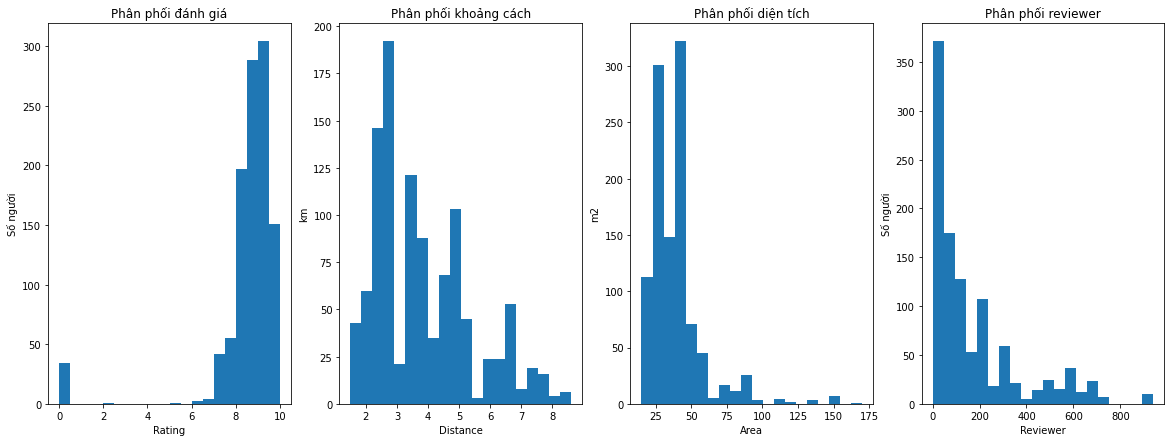

In [131]:
#Phân phối của các cột 'rating','reviewer' , 'distance', 'area', 'price'
#Biểu đồ phân phối price, distance, rating
plt.figure(figsize=(20,7))
plt.subplot(1,4,1)
plt.title("Phân phối đánh giá")
plt.xlabel("Rating")
plt.ylabel("Số người")
plt.hist( df[['rating']], bins=20)

plt.subplot(1,4,2)
plt.title("Phân phối khoảng cách")
plt.xlabel("Distance")
plt.ylabel("km")
plt.hist( df[['distance']], bins=20)

plt.subplot(1,4,3)
plt.title("Phân phối diện tích")
plt.xlabel("Area")
plt.ylabel("m2")
plt.hist( df[['area']], bins=20)

plt.subplot(1,4,4)
plt.title("Phân phối reviewer")
plt.xlabel("Reviewer")
plt.ylabel("Số người")
plt.hist( df[['reviewer']], bins=20)
plt.show


In [132]:
df.head()

,type_hotel,location,rating,reviewer,distance,type_bed,area,price
0,1,6,9.0,571,4.7,4,18,1200
1,1,6,9.0,571,4.7,10,25,1140
2,1,6,9.0,571,4.7,10,28,1400
3,1,6,9.0,571,4.7,4,35,2000
4,1,6,9.0,571,4.7,5,35,2100


<AxesSubplot:>

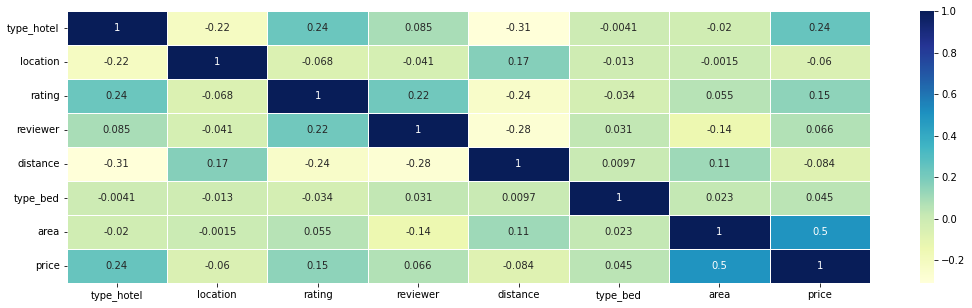

In [133]:
#Kiểm tra sự tương quan giữa các cột bằng bản đồ nhiệt 
plt.figure(figsize=(18,5))
sns.heatmap(df.corr(), annot=True, lw = 0.5, linecolor="w",cmap="YlGnBu")

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 0 to 1123
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type_hotel  1079 non-null   int32  
 1   location    1079 non-null   int32  
 2   rating      1079 non-null   float64
 3   reviewer    1079 non-null   int64  
 4   distance    1079 non-null   float64
 5   type_bed    1079 non-null   int32  
 6   area        1079 non-null   int64  
 7   price       1079 non-null   int64  
dtypes: float64(2), int32(3), int64(3)
memory usage: 95.5 KB


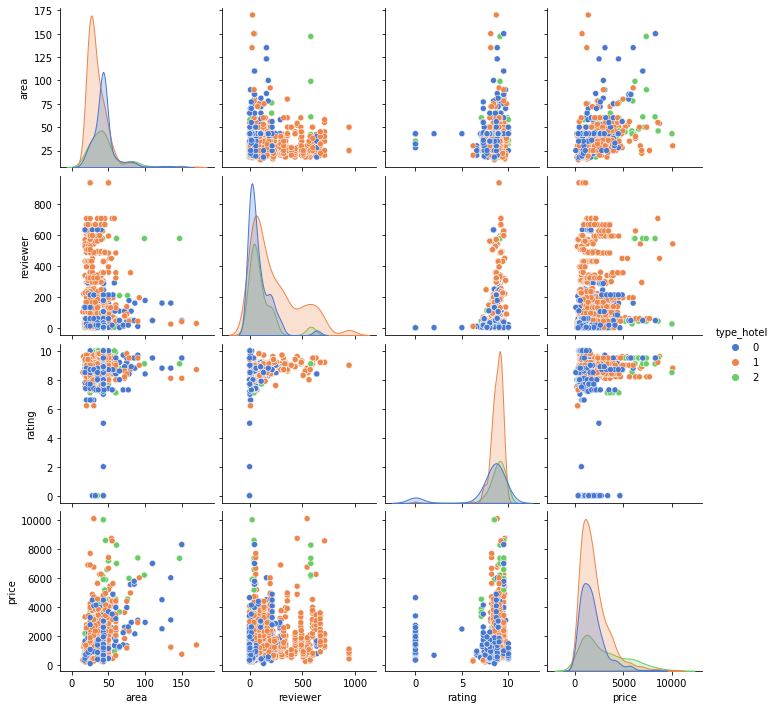

In [135]:
##Biểu đồ point
sns.pairplot(df[['area','type_hotel','reviewer','rating','price']],hue='type_hotel',  palette = 'muted')



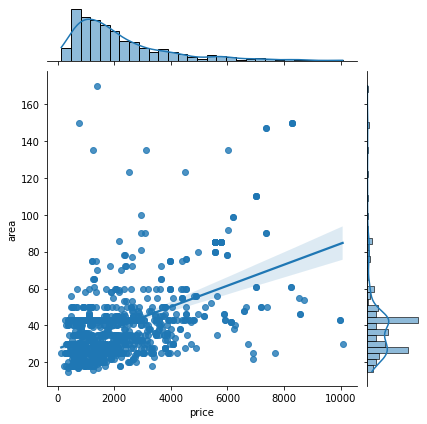

In [136]:
sns.jointplot(x= 'price', y= 'area', kind= 'reg', data= df)


**3. Xử lý dữ liệu ngoại lệ**

<AxesSubplot:>

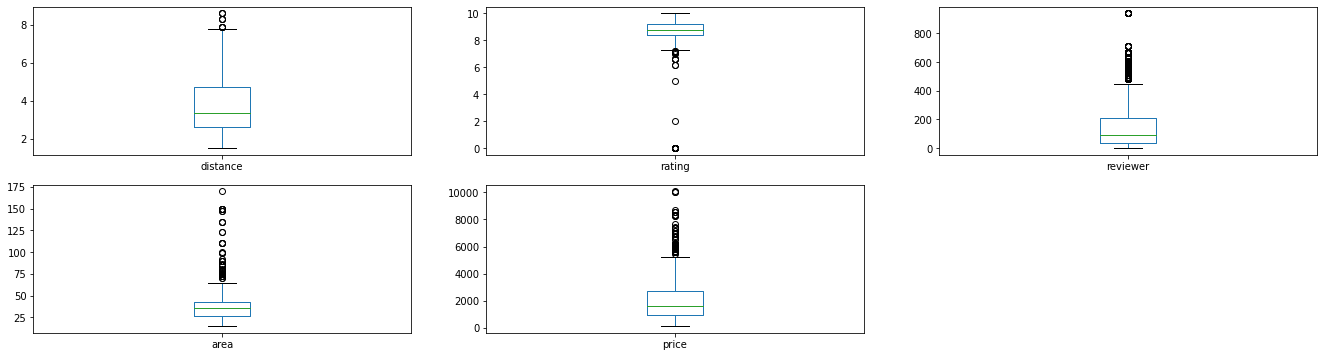

In [137]:
plt.rcParams["figure.figsize"] = [23,6]

plt.subplot(2,3,1)
df.boxplot(column='distance',grid=False)

plt.subplot(2,3,2)
df.boxplot(column='rating',grid=False)

plt.subplot(2,3,3)
df.boxplot(column='reviewer',grid=False)

plt.subplot(2,3,4)
df.boxplot(column='area',grid=False)

plt.subplot(2,3,5)
df.boxplot(column='price',grid=False)

In [138]:
## Thuật toán xử lí ngoại lệ với IQR 
# Phân bố lệch
def detectOutlierIQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_value = q1 - 1.5*iqr
    upper_value = q3 + 1.5*iqr

  #processing detect oulier 
    outlier = []
    for x in df:
        if (x>upper_value):
            df = df.replace([x],upper_value)
        elif (x<lower_value):
            df = df.replace([x],lower_value)
    
    return df

df.loc[:,'rating'] = detectOutlierIQR(df['rating']);
df.loc[:,'reviewer'] = detectOutlierIQR(df['reviewer']);
df.loc[:,'distance'] = detectOutlierIQR(df['distance']);
df.loc[:,'area'] = detectOutlierIQR(df['distance']);
df.loc[:,'price'] = detectOutlierIQR(df['price']);

<AxesSubplot:>

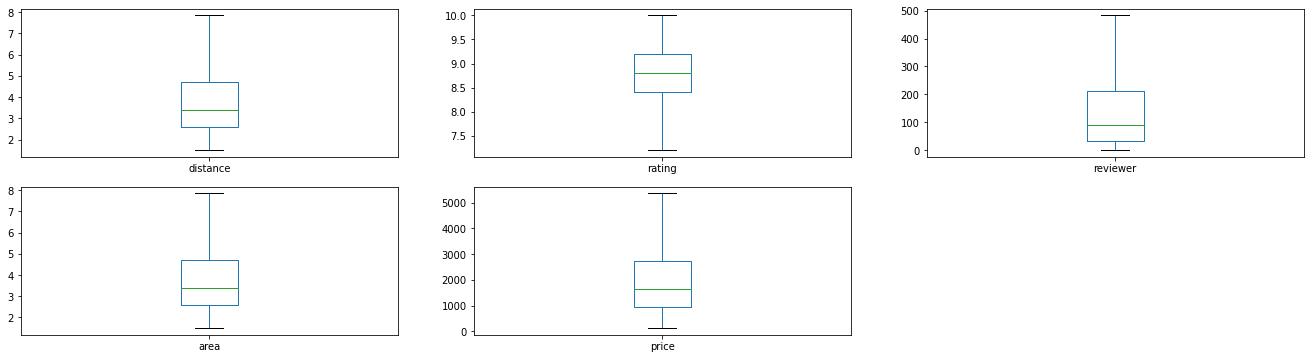

In [139]:
plt.rcParams["figure.figsize"] = [23,6]

plt.subplot(2,3,1)
df.boxplot(column='distance',grid=False)

plt.subplot(2,3,2)
df.boxplot(column='rating',grid=False)

plt.subplot(2,3,3)
df.boxplot(column='reviewer',grid=False)

plt.subplot(2,3,4)
df.boxplot(column='area',grid=False)

plt.subplot(2,3,5)
df.boxplot(column='price',grid=False)

**4. Mô hình hóa dự đoán dữ liệu**

**4.1 Chuẩn hóa dữ liệu**

In [141]:
data = df
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), index=df.index, columns=df.columns)
data['price'] = df['price']

**4.2 Mô hình hóa dữ liệu**

In [142]:
models = {
        "Linear": LinearRegression(),
        "KNeighbors": KNeighborsRegressor(),
        "RandomForest":RandomForestRegressor(),
         }
#this function used to evalute the models with features and terget.
def models_score(models, x_train, x_val, y_train, y_val):    
    
    evalutes = {}
    i = 0
    maes = []
    rmse = []
    names = []
    scores = []
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred=model.predict(x_val) 
        names.append(name)
        scores.append(metrics.explained_variance_score(y_val, y_pred))
        maes.append(mean_absolute_error(y_val,y_pred))
        rmse.append(sqrt(mean_squared_error(y_val,y_pred)))
    evalutes = {'Algorithms': names, 'Variance': scores, 'MAE': maes, 'RMSE': rmse}
    model_scores = pd.DataFrame(evalutes)
    # model_scores = model_scores.sort_values('MAE',ascending=False)
    return model_scores

#PCA

**So sánh giữa giảm chiều dữ liệu PCA và không giảm chiều dữ liệu PCA**

In [143]:
### PCA 
my_pca = PCA(n_components=3)
X_data_PCA = my_pca.fit_transform(data.drop(['price'],axis=1))
Y_target_PCA = data['price']
### NoPCA
X_data_noPCA = data.drop(['price'],axis=1)
Y_target_noPCA = data['price']

In [144]:
## Phan chia du lieu 

#PCA
X_PCA_train,X_PCA_test,y_pca_train,y_pca_test=train_test_split(X_data_PCA,Y_target_PCA,test_size=0.2, random_state=0)
#No PCA
X_noPCA_train,X_noPCA_test,y_nopca_train,y_nopca_test=train_test_split(X_data_noPCA,Y_target_noPCA,test_size=0.2, random_state=0)


In [145]:
#PCA
model_scores_PCA = models_score(models, X_PCA_train, X_PCA_test, y_pca_train, y_pca_test).set_index('Algorithms')
#NoPCA
model_scores_noPCA = models_score(models, X_noPCA_train, X_noPCA_test, y_nopca_train, y_nopca_test).set_index('Algorithms')
print('PCA')
print(model_scores_PCA)
print('--------------------------------------------')
print('No PCA')
print(model_scores_noPCA)

PCA
              Variance          MAE         RMSE
Algorithms                                      
Linear        0.079514  1136.589779  1415.022060
KNeighbors    0.625172   649.483565   909.634724
RandomForest  0.715755   535.422571   786.884358
--------------------------------------------
No PCA
              Variance          MAE         RMSE
Algorithms                                      
Linear        0.093591  1145.263322  1403.900058
KNeighbors    0.582283   708.150231   966.588500
RandomForest  0.831293   418.323128   606.138127


Text(0.5, 1.0, 'Compare score using PCA and NoPCA by Algorithms')

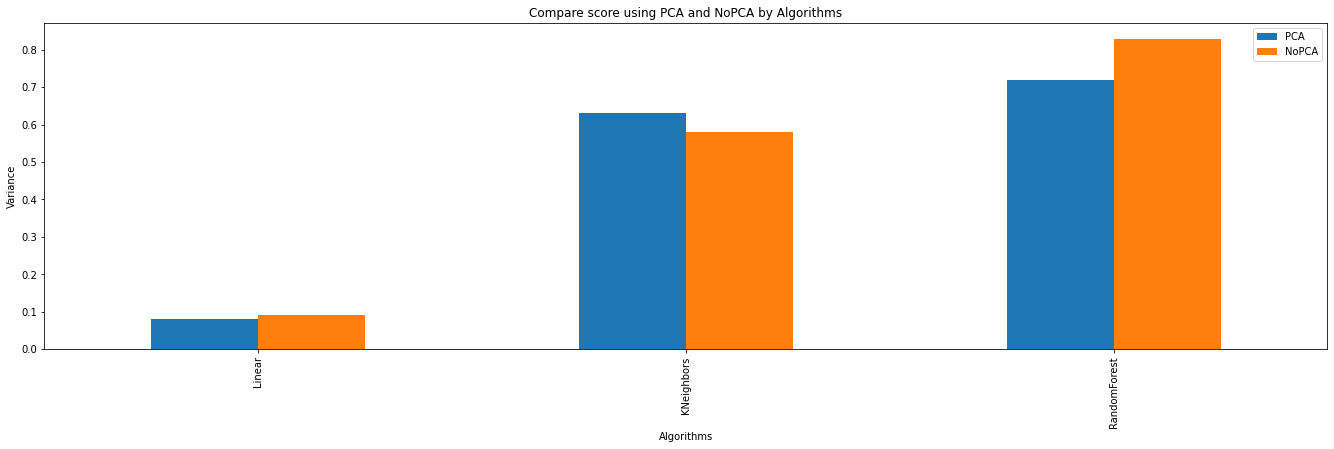

In [201]:
import pandas as pd

df_comparea_pca = pd.DataFrame({
    'Algorithms': list(model_scores_PCA.index),
    'PCA': [round(model_scores_PCA['Variance'][0],2), round(model_scores_PCA['Variance'][1],2), round(model_scores_PCA['Variance'][2],2)],
    'NoPCA': [round(model_scores_noPCA['Variance'][0],2), round(model_scores_noPCA['Variance'][1],2), round(model_scores_noPCA['Variance'][2],2)],
})
  
# plotting graph
fig = df_comparea_pca.plot(x="Algorithms", y=["PCA", "NoPCA"], kind="bar")
fig.set_ylabel('Variance')
fig.set_xlabel('Algorithms')
fig.set_title('Compare score using PCA and NoPCA by Algorithms')

=> Chọn không dùng giảm chiều dữ liệu PCA

**So sánh các mô hình dự đoán**

In [148]:
X_data = data.drop(['price'],axis=1)
y_target = data['price']

### Chia tap du lieu train,validation, test 
X_train, X_val_test, y_train, y_val_test = train_test_split(X_data,y_target, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_val_test,y_val_test, test_size=0.5, random_state=0)

In [149]:
model_scores_val = models_score(models, X_train, X_val, y_train, y_val).set_index('Algorithms')
model_scores_val

,Variance,MAE,RMSE
Algorithms,,,
Linear,0.076140,1050.173418,1303.150822
KNeighbors,0.397380,774.165432,1062.381014
RandomForest,0.749822,477.939452,682.325913


**So sánh nhận diện giữa các model**

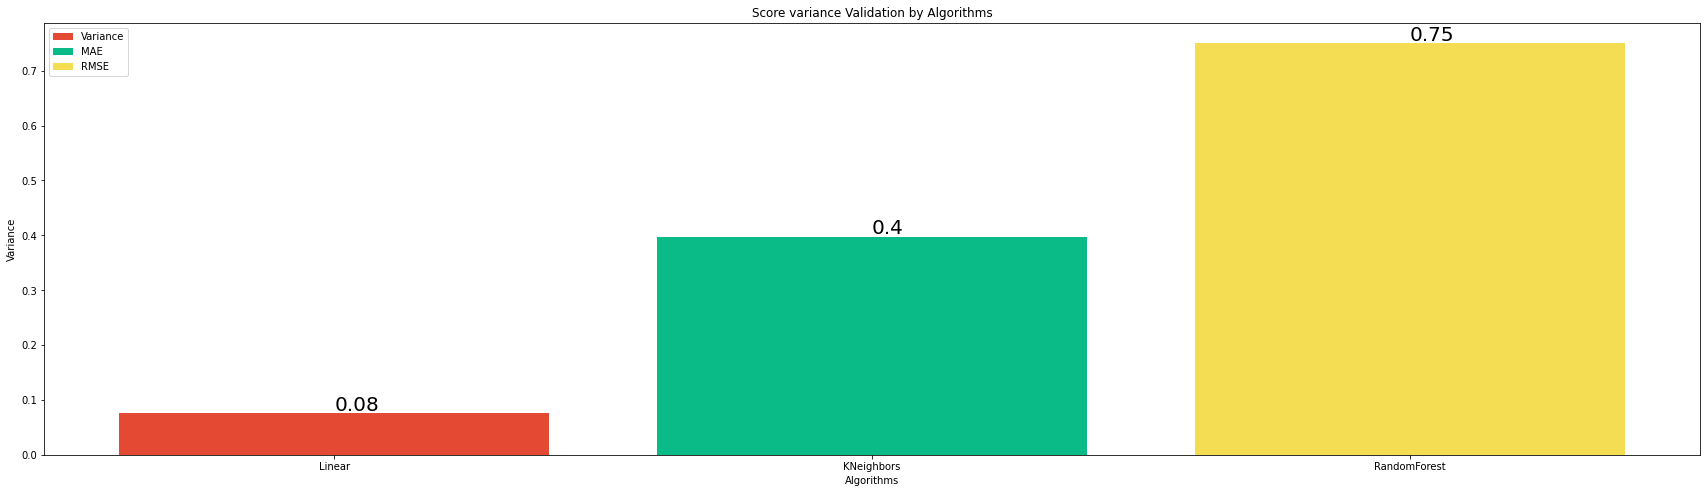

In [202]:
colors=["#e44933","#0abb87","#f4dd53"]


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model_scores_val.style.bar()
fig = ax.bar(model_scores_val.index,model_scores_val['Variance'], color=colors)
for index,value in enumerate(model_scores_val['Variance']):
    plt.text(x=index , y =value+0.005 , s=f"{round(value,2)}" , fontdict=dict(fontsize=20))
ax.set_ylabel('Variance')
ax.set_xlabel('Algorithms')
ax.set_title('Score variance Validation by Algorithms')
plt.legend(fig, model_scores_val.columns)

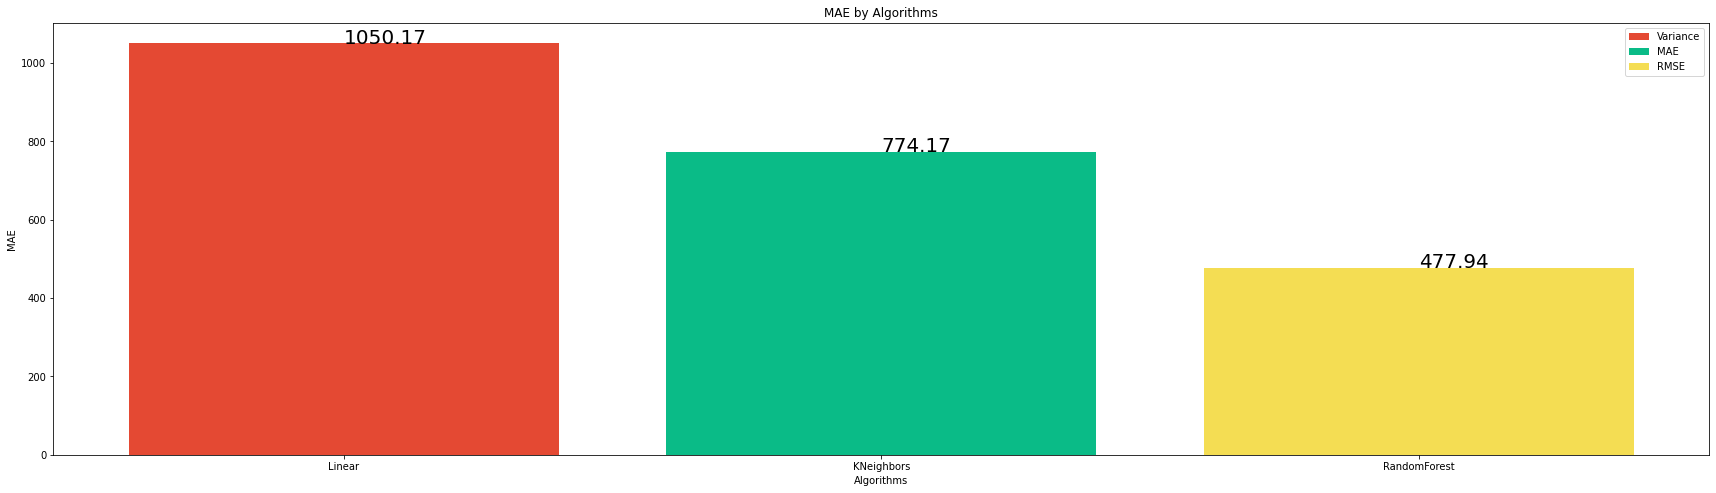

In [151]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model_scores_val.style.bar()
fig = ax.bar(model_scores_val.index,model_scores_val['MAE'], color=colors)
for index,value in enumerate(model_scores_val['MAE']):
    plt.text(x=index , y =value+0.001 , s=f"{round(value,2)}" , fontdict=dict(fontsize=20))
ax.set_ylabel('MAE')
ax.set_xlabel('Algorithms')
ax.set_title('MAE by Algorithms')
plt.legend(fig, model_scores_val.columns)

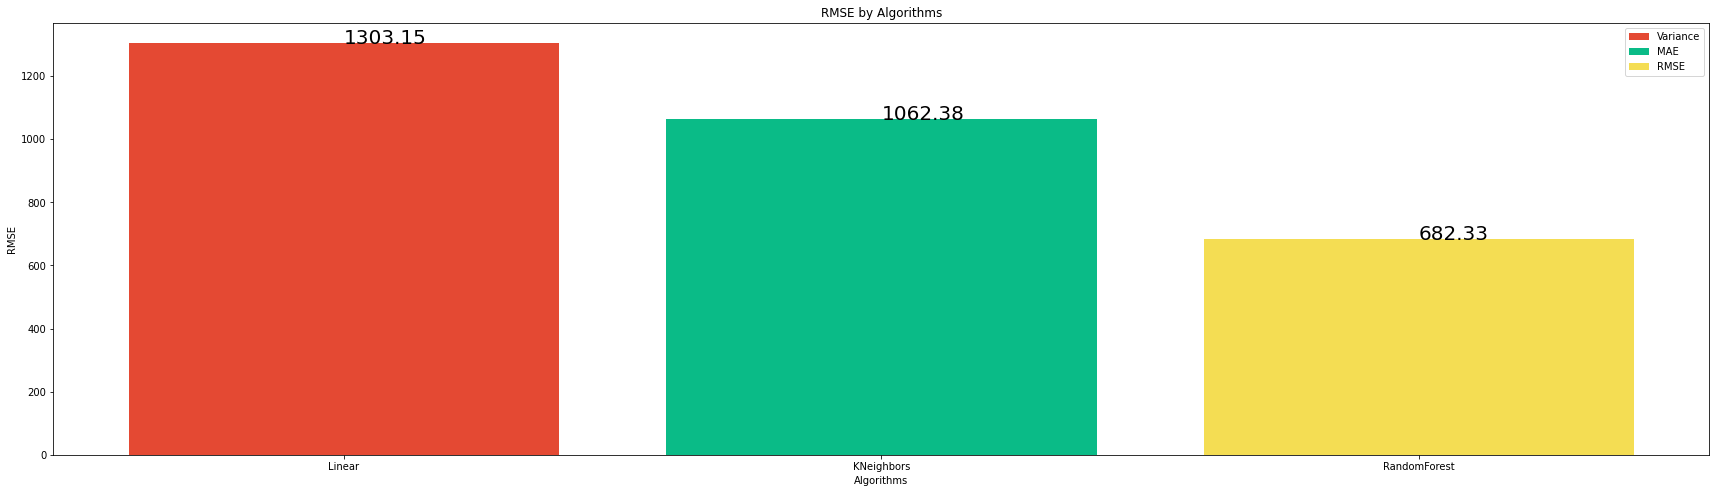

In [152]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model_scores_val.style.bar()
fig = ax.bar(model_scores_val.index,model_scores_val['RMSE'], color=colors)
for index,value in enumerate(model_scores_val['RMSE']):
    plt.text(x=index , y =value+0.001, s=f"{round(value,2)}" , fontdict=dict(fontsize=20))
ax.set_ylabel('RMSE')
ax.set_xlabel('Algorithms')
ax.set_title('RMSE by Algorithms')
plt.legend(fig, model_scores_val.columns)

Từ những bước chọn metrics để đánh giá 

=> Chọn model RandomForestRegressor để đánh giá

**Lựa chọn model RandomForestRegressor**

In [158]:
X_data = data.drop(['price'],axis=1)
y_target = data['price']
X_train, X_test, y_train, y_test = train_test_split(X_data,y_target, test_size=0.3, random_state=0)


In [172]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred_model = model.predict(X_test)
score_variance = metrics.explained_variance_score(y_test, y_pred_model)*100
print('Evaluate prediction based on variance : ', score_variance)

Evaluate prediction based on variance :  81.04863375003359


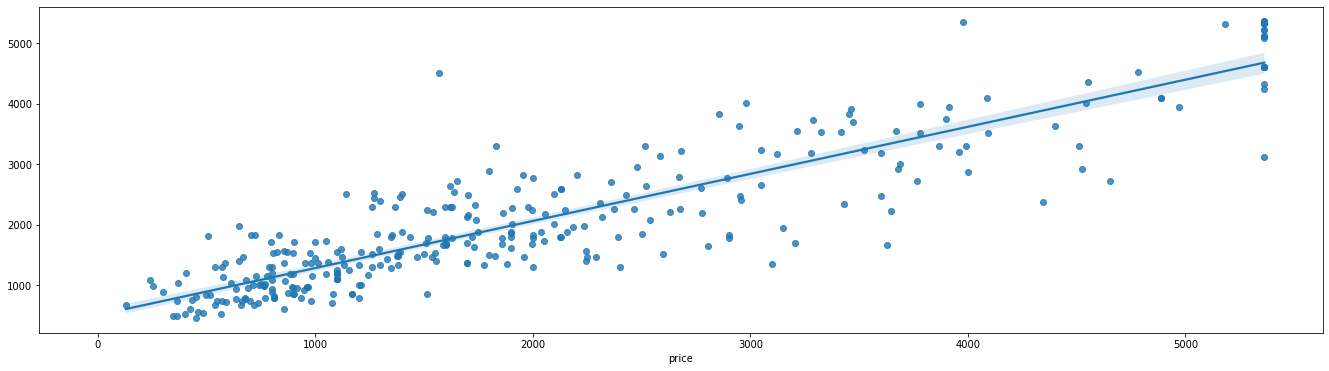

In [173]:
## do thi bieu thi gia tri du doan va gia tri thuc te
fig = sns.regplot(x=y_test,y=y_pred_model)
plt.plot([0,0],[5000,5000],color='red')


**Cải thiện thuật toán RandomForestRegressor**

In [182]:
## Cai thien thuat toan => sieu tham so : dung thuat toan : GridSearch CV


from sklearn.model_selection import GridSearchCV

estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(X_train, y_train)
y_pred_grid = grid.predict(X_test)
print("Best score: " + str(grid.best_score_))
score_grid = metrics.explained_variance_score(y_test, y_pred_grid)*100

print("Score by before gridsearch:" + str(score_variance))
print("Score by after gridsearch:" + str(score_grid))
print('Cải thiện được: '+ str(score_grid-score_variance))


Best score: 0.7104506783102585
Score by before gridsearch:81.04863375003359
Score by after gridsearch:81.45680290710244
Cải thiện được: 0.4081691570688548


In [200]:
# Tu chon thuoc tinh 
data_choice_features = data[['type_hotel','area','rating','reviewer','price', 'type_bed']]
X_data_choice = data_choice_features.drop(['price'],axis=1)
y_target_choice = data_choice_features['price']

### Chia du lieu va du doan mo hinh randomforest 
X_choice_train,X_choice_test,y_choice_train,y_choice_test=train_test_split(X_data_choice,y_target_choice,test_size=0.2, random_state=0)
model_choice = RandomForestRegressor()
model_choice.fit(X_train,y_train)
y_pred_choice = model_choice.predict(X_test)
score_choice = metrics.explained_variance_score(y_test, y_pred_choice)*100

print("Score by before Choice:" + str(score_choice))
print("Score by after Choice:" + str(score_variance))

print('Cải thiện được: '+ str(score_choice-score_variance))

Score by before Choice:81.68498325343394
Score by after Choice:81.04863375003359
Cải thiện được: 0.6363495034003535


**So sánh dữ liệu có min-max scaling và không min-max scaling**

In [100]:
## So sanh 
data = df
scaler = MinMaxScaler()
data_minmax = pd.DataFrame(scaler.fit_transform(data), index=df.index, columns=df.columns)
data_nominmax = data

# ----------------MinMax--------------------

X_data_minmax = data_minmax.drop(['price'],axis=1)
y_data_minmax = data_minmax['price']

#---------------noMinMax--------------------
X_data_nominmax = data_nominmax.drop(['price'],axis=1)
y_data_nominmax = data_nominmax['price']

#### BUILD MODEL ### 
X_MinMax_train,X_MinMax_test,y_minmax_train,y_minmax_test=train_test_split(X_data_minmax,y_data_minmax,test_size=0.2, random_state=0)
X_noMinMax_train,X_noMinMax_test,y_nominmax_train,y_nominmax_test=train_test_split(X_data_nominmax,y_data_nominmax,test_size=0.2, random_state=0)
#PCA
model_scores_PCA = models_score(models, X_MinMax_train, X_MinMax_test, y_minmax_train, y_minmax_test).set_index('Algorithms')
#NoPCA
model_scores_noPCA = models_score(models, X_noMinMax_train, X_noMinMax_test, y_nominmax_train, y_nominmax_test).set_index('Algorithms')
print('PCA')
print(model_scores_PCA)
print('--------------------------------------------')
print('No PCA')
print(model_scores_noPCA)



PCA
              Variance       MAE      RMSE
Algorithms                                
Linear        0.093591  0.218844  0.268265
KNeighbors    0.582283  0.135317  0.184701
RandomForest  0.830738  0.079976  0.115978
--------------------------------------------
No PCA
              Variance          MAE         RMSE
Algorithms                                      
Linear        0.093591  1145.263322  1403.900058
KNeighbors    0.708969   587.808565   797.094498
RandomForest  0.836778   408.828868   596.026794


# 5. Kết luận

**Tổng kết những việc đã làm** 

Bước 1. Crawl dữ liệu 

Bước 2. Xử lý các giá trị không hợp lệ (area: theo dữ liệu string, distance==0, type_bed=='', )

Bước 3. Mô tả dữ liệu 

Bước 4. Trích xuất đặc trưng: làm sạch, xử lý ngoại lệ, chuẩn hóa dữ liệu, giảm chiều dữ liệu... 

Bước 5. Áp dụng các model dự đoán tỉ lệ 

Bước 6. So sánh các tỉ lệ metric

Bước 7. Chọn ra thuật toán phù hợp nhất 

Bước 8. Cải thiện thuật toán

**Kết quả đạt được** 

1. Quá trình crawl data: Crawl được (1079,8)

2. Quá trình so sánh model: 
Thông qua việc so sánh Variance, MAE, RMSE
=>> Chọn được model RandomForestRegressor: 
    Có sử dụng MinMaxScaler
    Không dùng PCA
    tỉ lệ score (~81%)


3. Quá trình cải thiện dữ liệu: 
    - Sử dụng thư viện để tìm siêu tham số

        =>  Có cải thiện được tuy nhiên không đáng kể 
        
            Tăng tỷ lệ lên tầm -0.5 -> 0.5 

    - Sử dụng thủ công tìm tham số

        =>  Có cải thiện được tuy nhiên không quá nhiều

            Tăng tỷ lệ lên tầm -0.6 -> 0.6


**Hướng phát triển**

+ Crawl dữ liệu nhiều đặc trưng hơn

+ Xử lý đặc trưng tại bước crawl dữ liệu 

+ Xử lý các giá trị không hợp lệ tại bước làm sạch dữ liệu theo computed sao cho đúng với các giá trị thực tế hơn

+ Thử nghiệp với các kĩ thuật Feature engineering khác: OneHotEncode,…
và các mô hình thuật toán khác.
